# Final Project ER and Non-maximum-Suppression Testing

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
import cv2 as cv
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

image = misc.imread("00_00.jpg")
holder = cv.imread("00_00.jpg",0)
image2 = image.copy()
image3 = image.copy()
image4 = image.copy()

grayimage = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
channels = cv.text.computeNMChannels(image)
thresh = []
points = []
cn = len(channels)-1
for c in range(0,cn):
    channels.append((255-channels[c]))
for channel in channels:
    classifier1 = cv.text.loadClassifierNM1("trained_classifierNM1.xml")
    filter1 = cv.text.createERFilterNM1(classifier1, 2, .00025, .13, .7,True, .1)

    classifier2 = cv.text.loadClassifierNM2("trained_classifierNM2.xml")
    filter2 = cv.text.createERFilterNM2(classifier2, .3)

    regions = cv.text.detectRegions(channel, filter1, filter2)

    # points = [minx, miny, maxx, maxy]
    for i in range(len(regions)):
        for j in range(len(regions[i])):
            x = regions[i][j][0]
            y = regions[i][j][1]
            if(j == 0):
                minx = x
                maxx = x
                miny = y
                maxy = y
            if(minx > x):
                minx = x
            if(maxx < x):
                maxx = x
            if(miny > y):
                miny = y
            if(maxy < y):
                maxy = y
#             points[i][0] = minx
#             points[i][1] = miny
#             points[i][2] = maxx
#             points[i][3] = maxy
            
        thresh.append(holder[miny:maxy,minx:maxx])
        points.append([minx,miny,maxx,maxy])
    
    rects = cv.text.erGrouping(image,channel,[r.tolist() for r in regions])
    
    for r in range(0,np.shape(rects)[0]):
        rect = rects[r]
        cv.rectangle(image4, (rect[0],rect[1]), (rect[0]+rect[2],rect[1]+rect[3]), (255, 0, 0), 2)
    
    for i in range(len(points)):
        cv.rectangle(image2, (points[i][0], points[i][1]), (points[i][2], points[i][3]), (255,0,0), 1)
    

In [75]:
from sklearn.svm import SVC
from sklearn.externals import joblib
def svmclassifier(normalized_trainfeat,labeltrain):    
    clf = SVC()
    clf.fit(normalized_trainfeat,labeltrain)
    return clf
def extractfeat(path_dir):
    list_hog = []
    for i in range(0,np.size(path_dir)):
        img = cv.imread(path_dir[i],0)
        imresize = preprocess(img)
        fdpos=hog(imresize, orientations=9, pixels_per_cell=(32, 32), cells_per_block=(1, 1), visualise=False) 
        list_hog.append(fdpos)
    hog_features = np.array(list_hog,'float64')
    return hog_features

def preprocess(img):
    dim = (250,250)
    imresize = cv.resize(img,dim,interpolation=cv.INTER_AREA)
    return imresize

In [76]:
from sklearn.ensemble import AdaBoostClassifier
import glob
from skimage.feature import hog
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# pos_dir = glob.glob('E:\\College\\ECE_420\\Final_Project\\pos_training_data\\*.jpg')
# neg_dir = glob.glob('E:\\College\\ECE_420\\Final_Project\\neg_training_data\\*.png')

# X_train, X_test, y_train, y_test = train_test_split(pos_dir,neg_dir,test_size=0.33,random_state=42)

# trainpos = extractfeat(X_train)
# np.save('trainpos.mat',trainpos)
# trainneg = extractfeat(y_train)
# np.save('trainneg.mat',trainneg)
# testpos = extractfeat(X_test)
# np.save('testpos.mat',testpos)
# testneg = extractfeat(y_test)
# np.save('testneg.mat',testneg)

# trainfeat = np.vstack((trainpos, trainneg))
# normalized_trainfeat = preprocessing.normalize(trainfeat)
# np.save('trainingmat',normalized_trainfeat)

# labelpos = np.ones(np.size(X_train))
# labelneg = np.zeros(np.size(y_train))
# labeltrain = np.hstack((labelpos, labelneg))


# testfeat = np.vstack((testpos, testneg))
# normalized_testfeat = preprocessing.normalize(testfeat)
# np.save('trainingmat',normalized_testfeat)
# testlabelpos = np.ones(np.size(X_test))
# testlabelneg = np.zeros(np.size(y_test))
# labeltest = np.hstack((testlabelpos,testlabelneg))

# clf = svmclassifier(normalized_trainfeat,labeltrain)
# joblib.dump(clf, "digits_cls.pkl", compress=3)

# predicted = clf.predict(normalized_trainfeat)

# target_names = ['1', '0']

# print(classification_report(labeltrain,predicted, target_names=target_names))

# clf1 = svmclassifier(normalized_testfeat,labeltest)

# from sklearn.metrics import classification_report
# predicted1 = clf1.predict(normalized_testfeat)
# target_names = ['1', '0']
# print(classification_report(labeltest,predicted1, target_names=target_names))

              precision    recall  f1-score   support

           1       0.71      0.97      0.82      7594
           0       0.95      0.60      0.74      7594

   micro avg       0.78      0.78      0.78     15188
   macro avg       0.83      0.78      0.78     15188
weighted avg       0.83      0.78      0.78     15188

              precision    recall  f1-score   support

           1       0.65      0.99      0.78      3741
           0       0.97      0.46      0.62      3741

   micro avg       0.72      0.72      0.72      7482
   macro avg       0.81      0.72      0.70      7482
weighted avg       0.81      0.72      0.70      7482



In [261]:
def myfeat(image):
    list_hog = []
    for i in range(len(thresh)):
        img = image[i]
        imresize = preprocess(img)
        fdpos=hog(imresize, orientations=9, pixels_per_cell=(32, 32), cells_per_block=(1, 1), visualise=False) 
        list_hog.append(fdpos)
    hog_features = np.array(list_hog,'float64')
    return hog_features

In [262]:
feat = myfeat(thresh)
predict = clf.predict(feat)

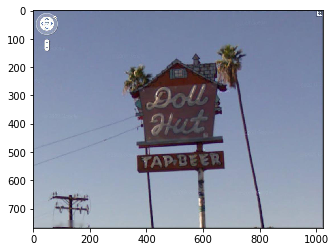

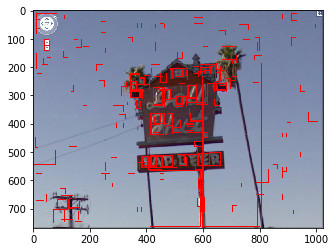

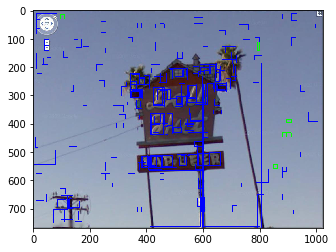

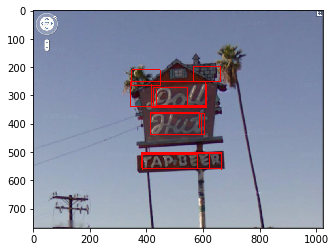

In [263]:
for i in range(len(predict)):
    if (predict[i] ==0):
        cv.rectangle(image3, (points[i][0], points[i][1]), (points[i][2], points[i][3]), (0,0,255), 1)
    else:
        cv.rectangle(image3, (points[i][0], points[i][1]), (points[i][2], points[i][3]), (0,255,0), 2)
        
plt.figure()
plt.imshow(image)
plt.show()
plt.figure()
plt.imshow(image2)
plt.show()
plt.figure()
plt.imshow(image3)
plt.show()
plt.figure()
plt.imshow(image4)
plt.show()

In [264]:
predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

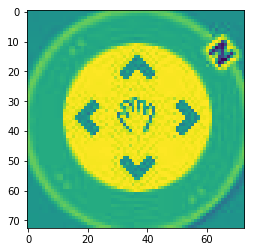

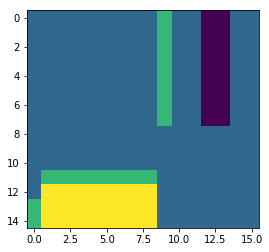

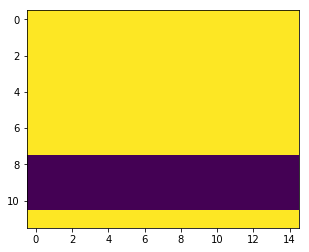

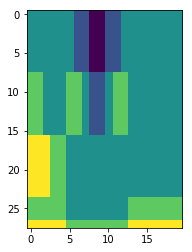

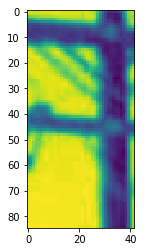

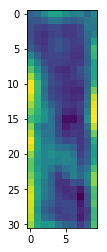

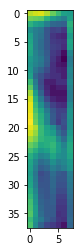

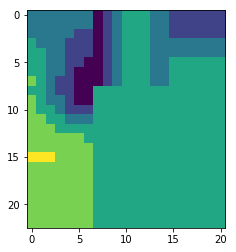

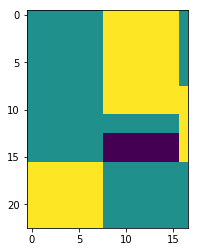

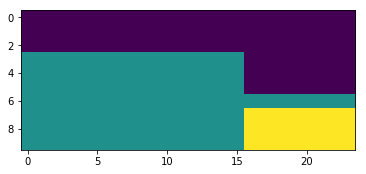

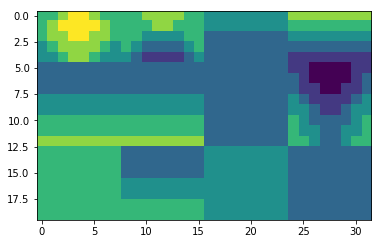

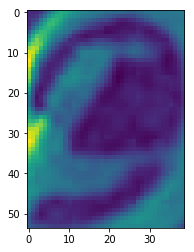

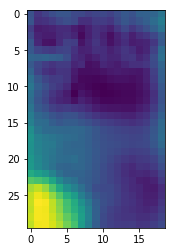

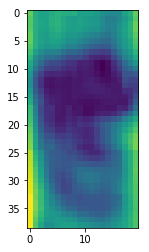

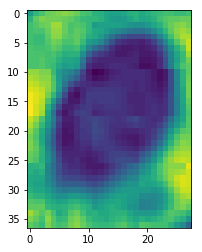

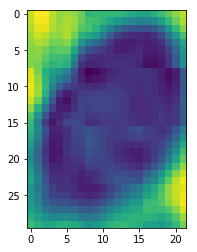

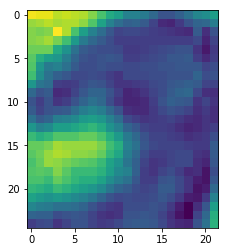

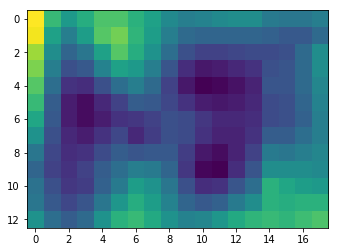

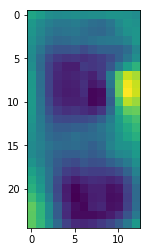

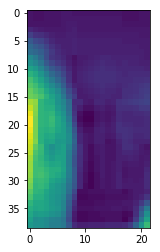

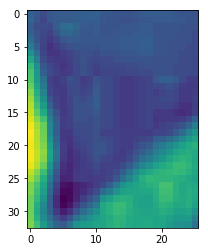

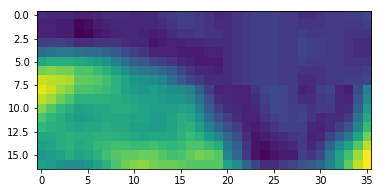

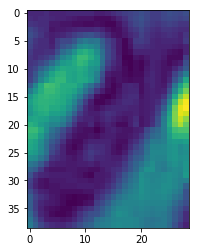

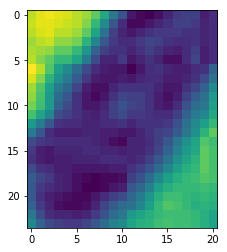

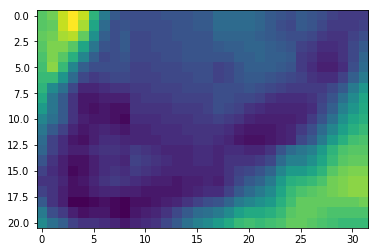

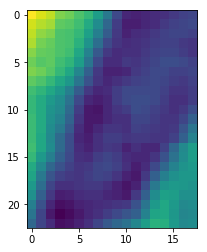

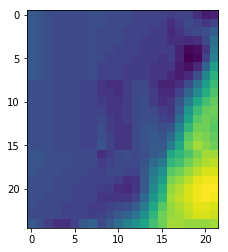

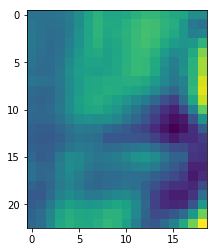

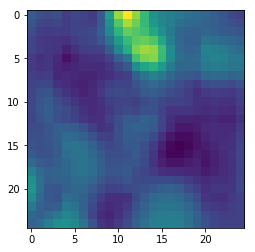

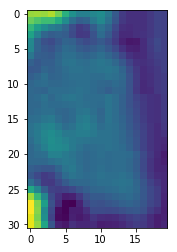

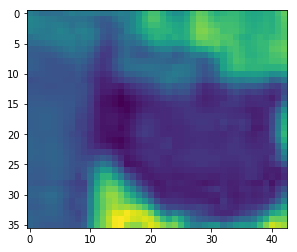

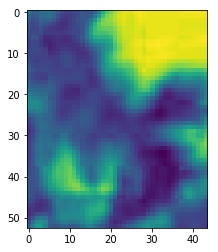

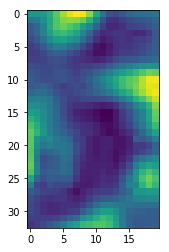

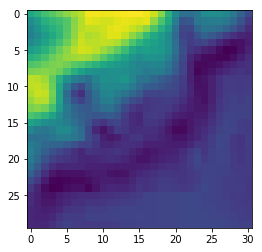

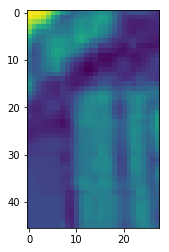

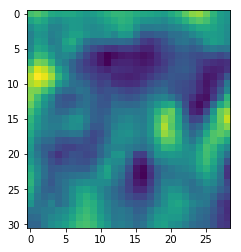

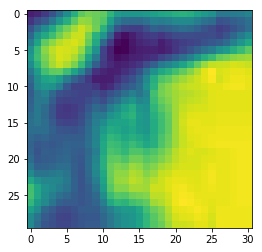

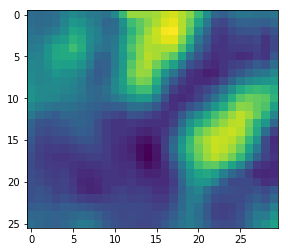

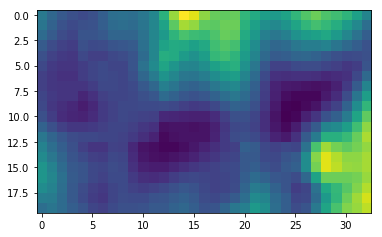

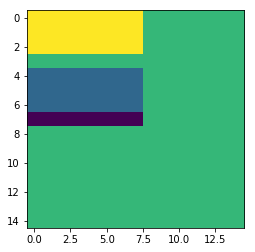

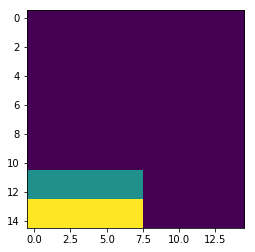

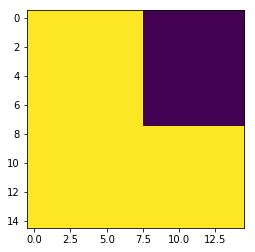

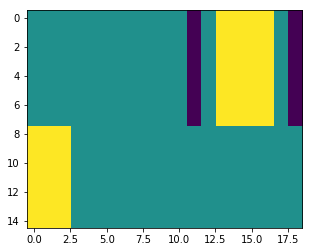

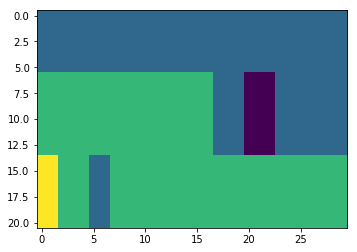

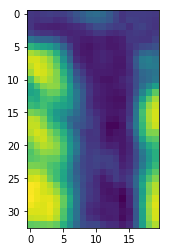

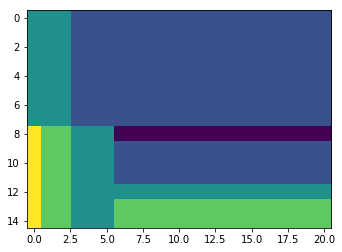

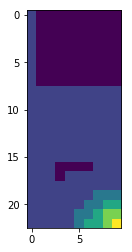

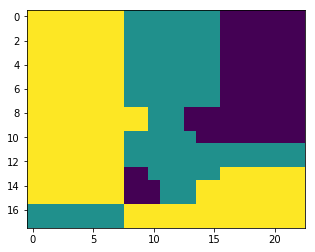

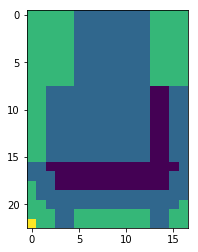

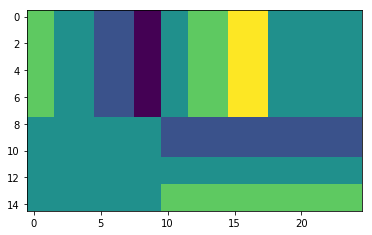

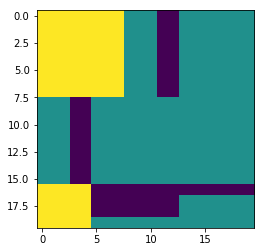

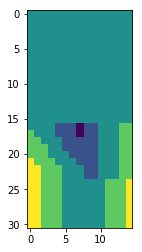

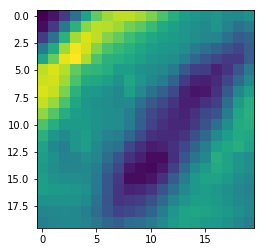

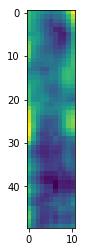

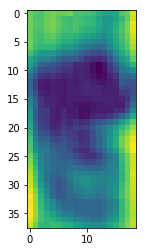

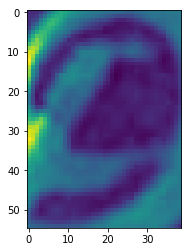

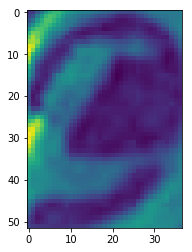

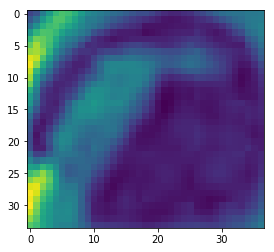

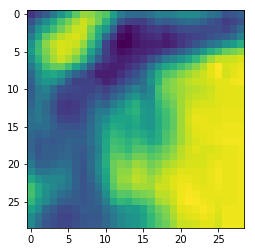

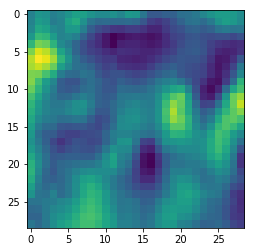

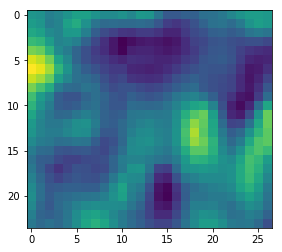

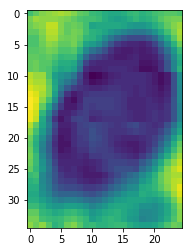

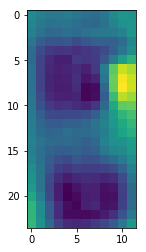

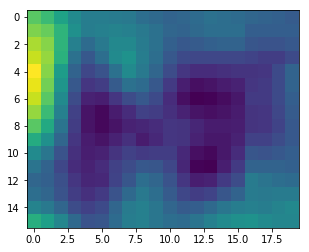

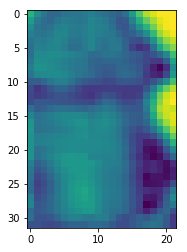

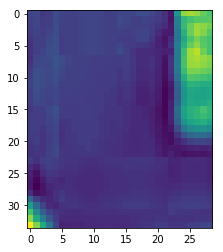

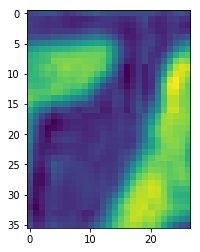

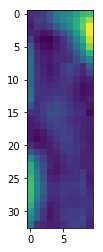

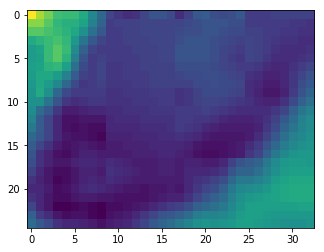

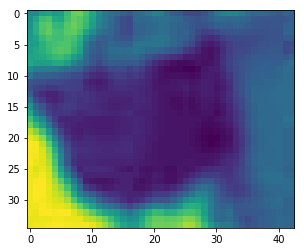

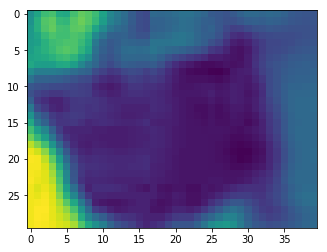

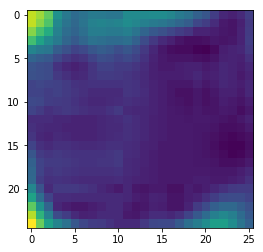

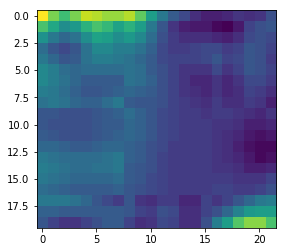

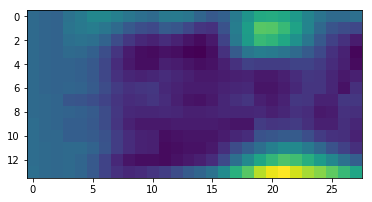

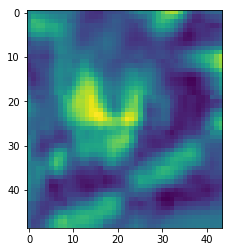

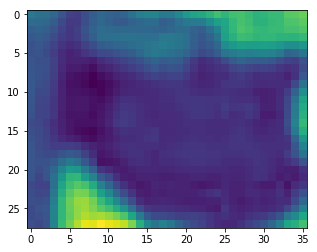

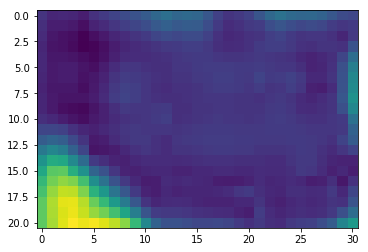

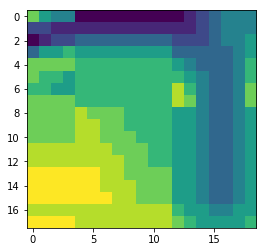

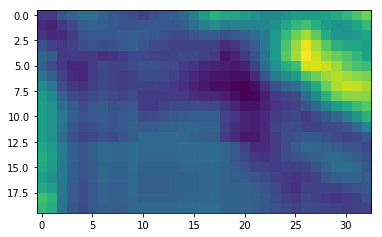

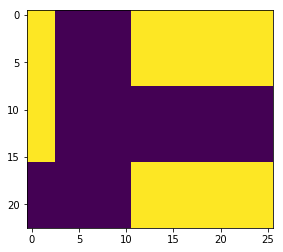

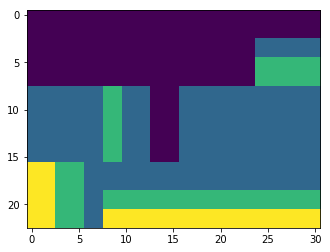

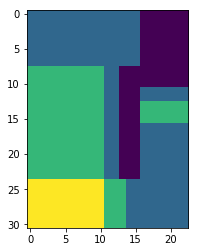

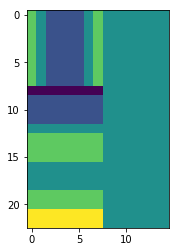

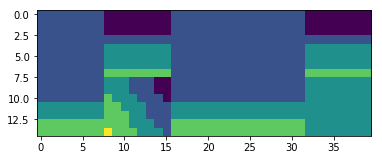

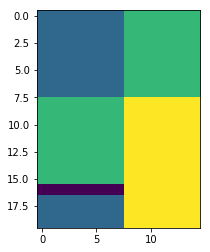

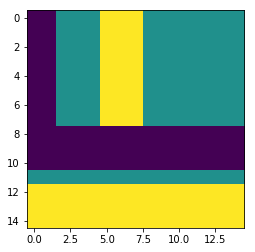

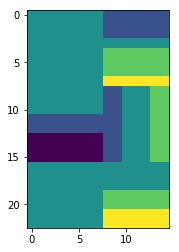

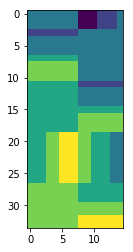

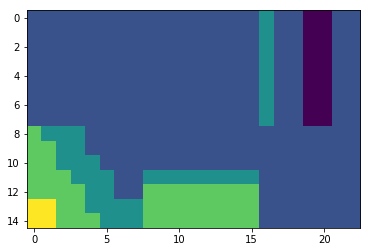

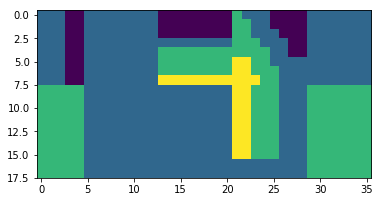

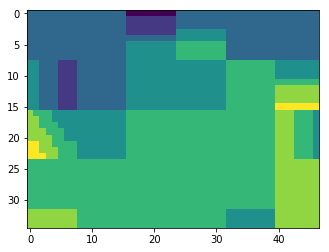

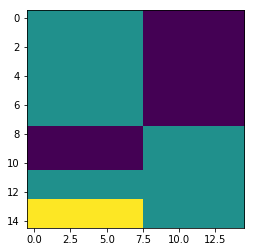

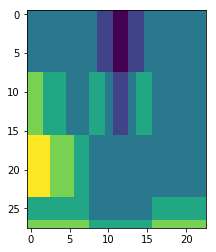

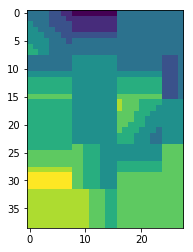

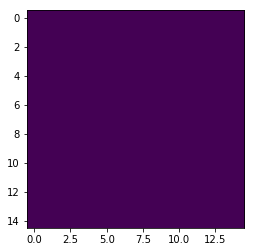

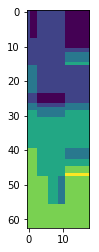

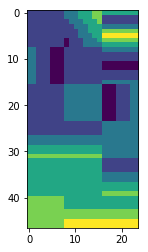

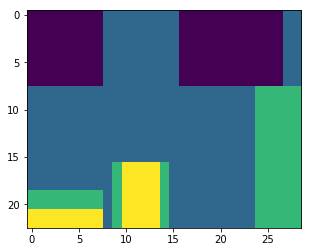

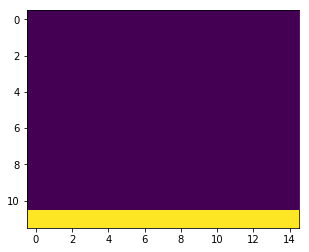

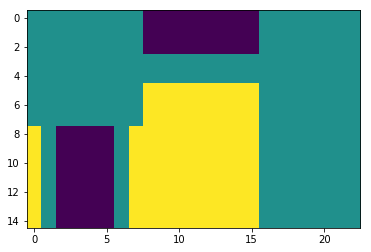

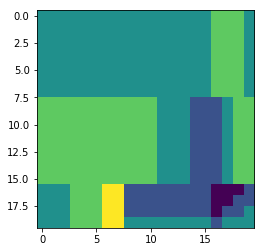

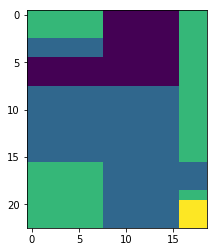

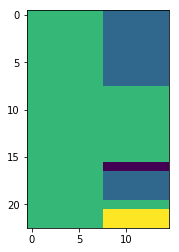

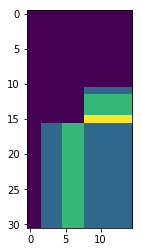

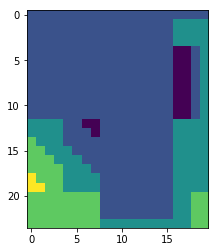

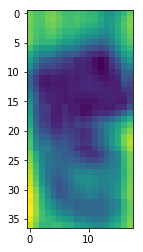

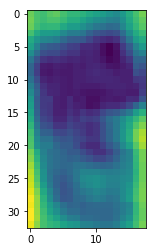

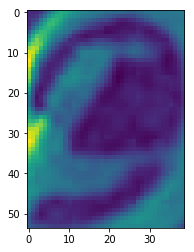

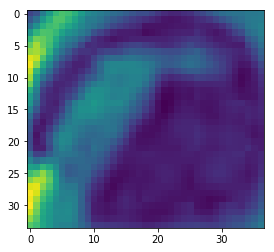

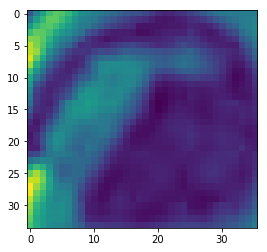

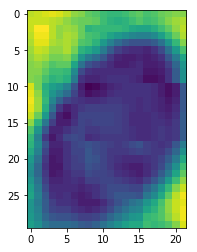

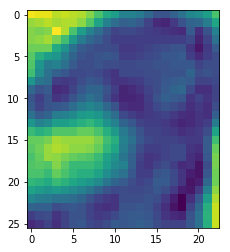

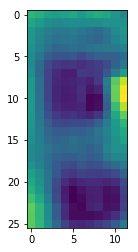

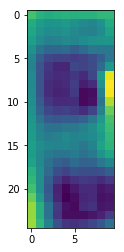

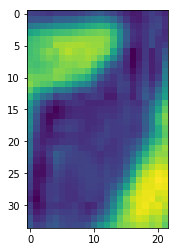

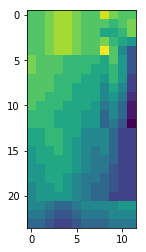

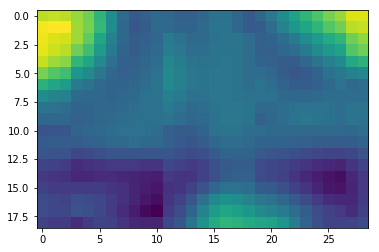

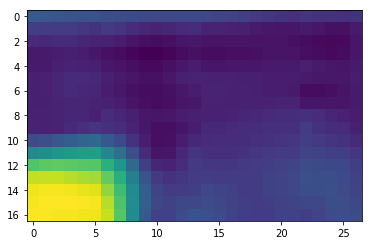

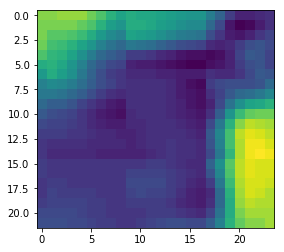

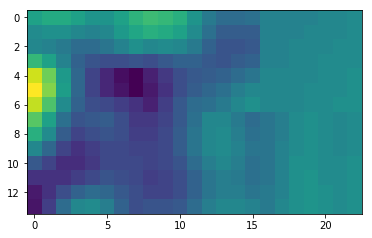

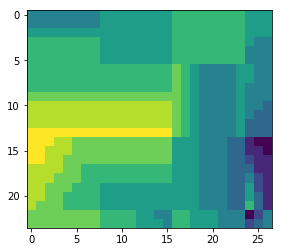

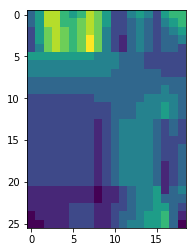

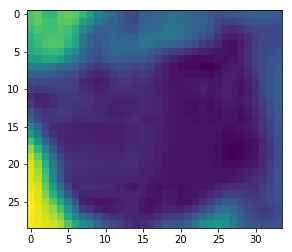

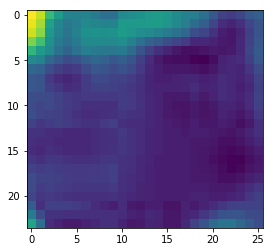

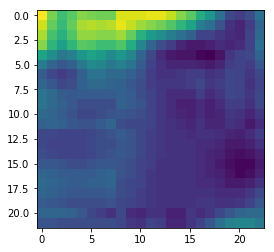

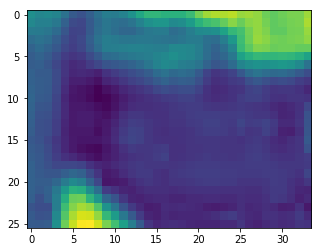

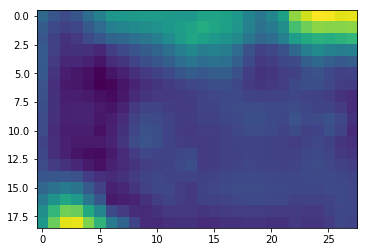

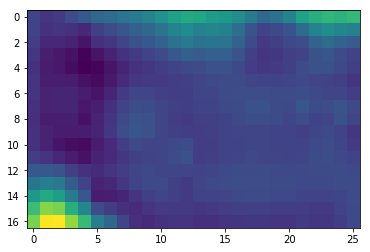

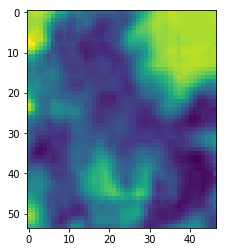

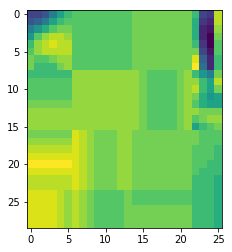

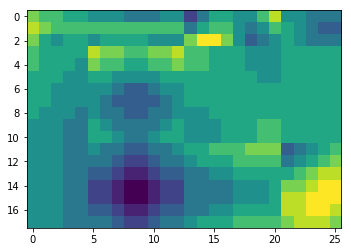

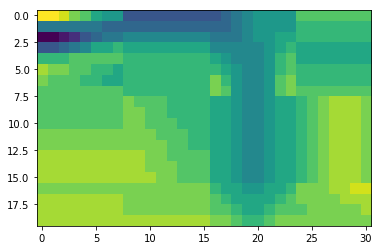

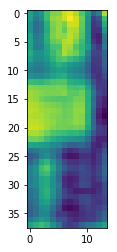

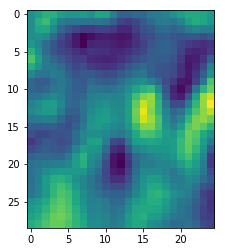

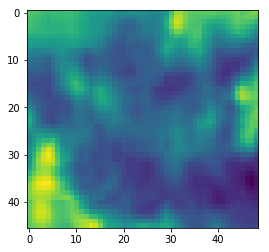

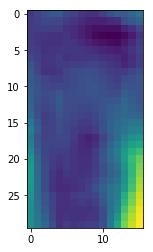

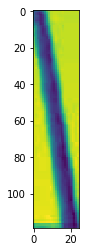

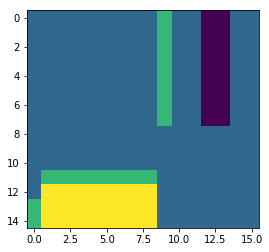

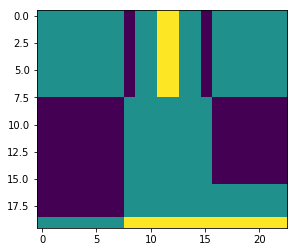

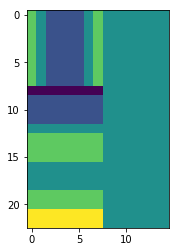

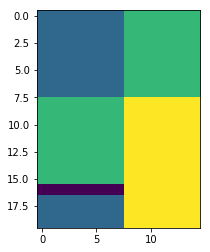

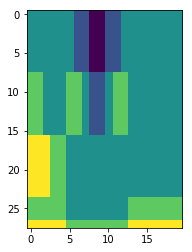

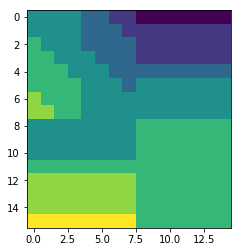

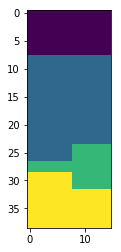

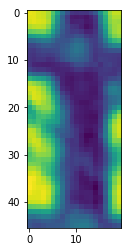

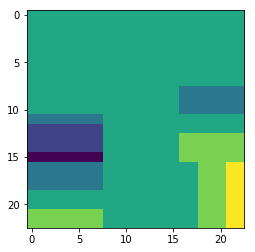

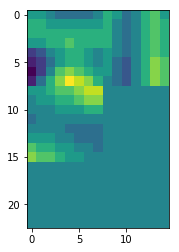

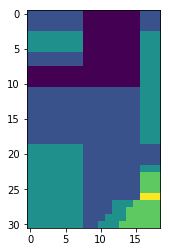

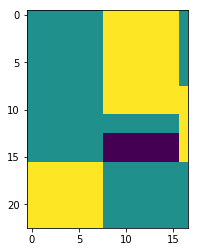

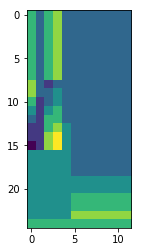

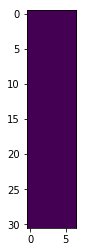

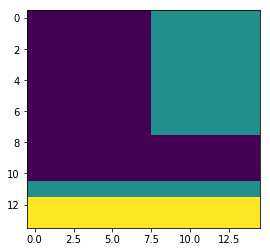

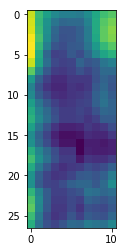

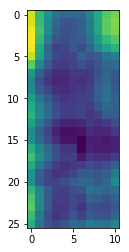

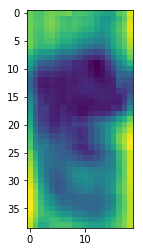

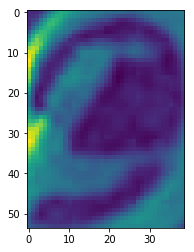

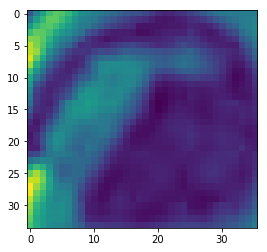

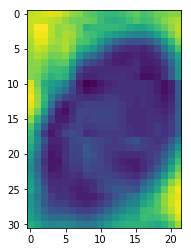

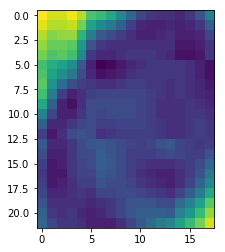

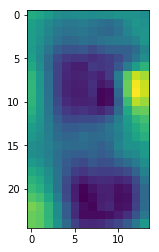

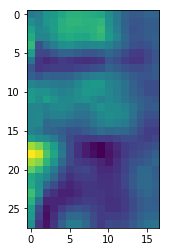

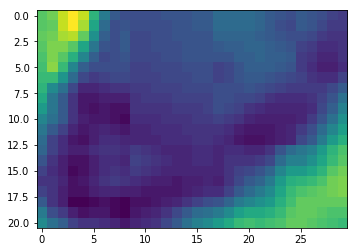

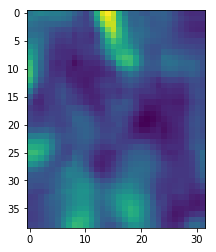

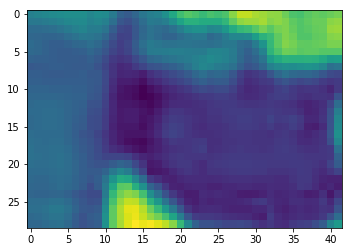

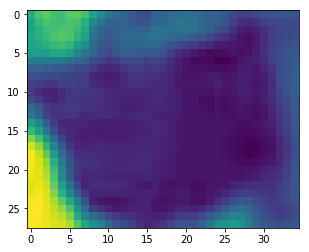

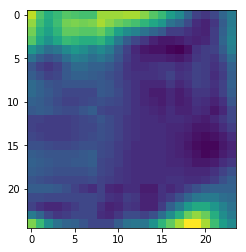

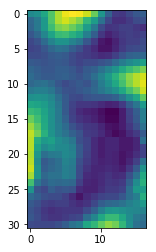

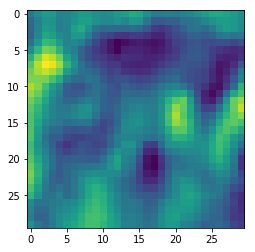

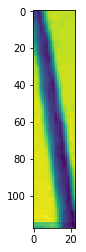

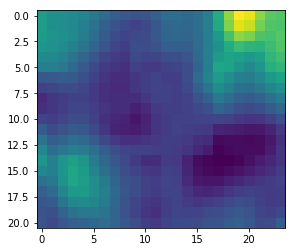

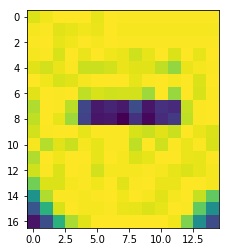

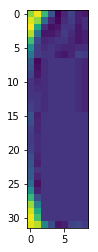

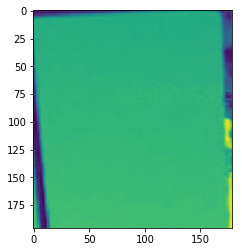

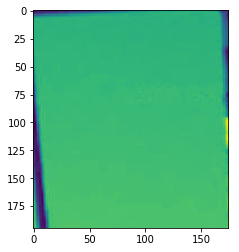

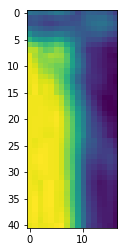

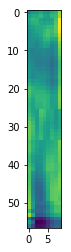

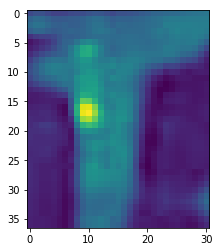

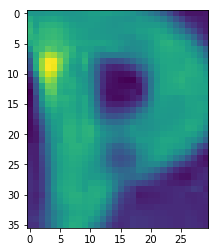

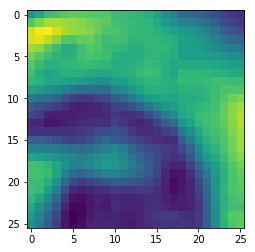

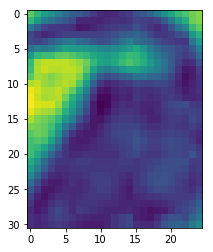

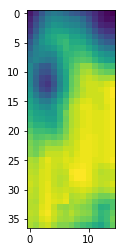

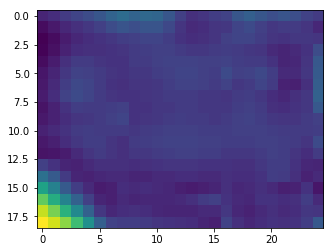

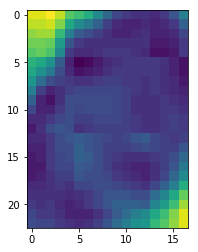

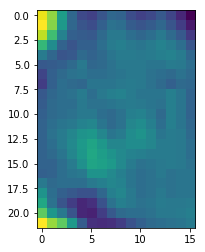

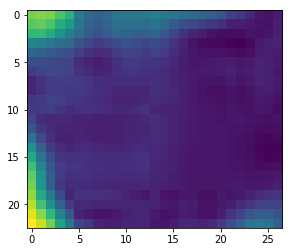

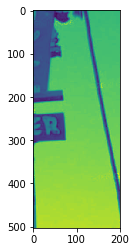

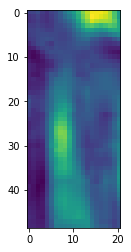

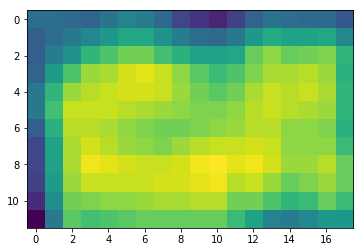

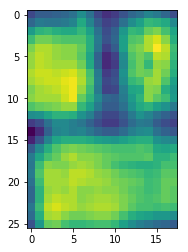

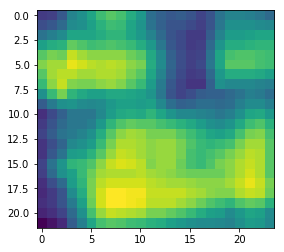

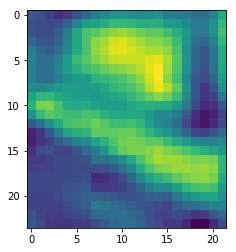

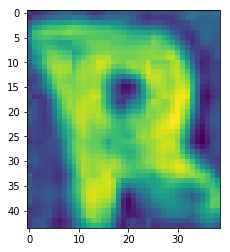

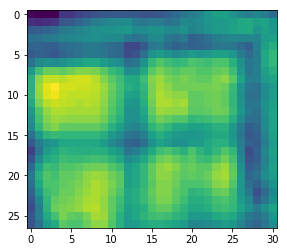

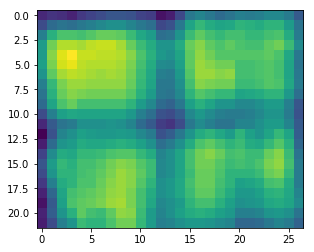

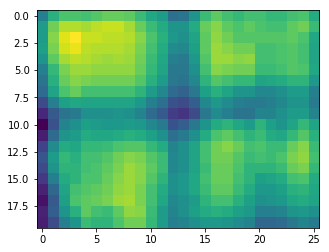

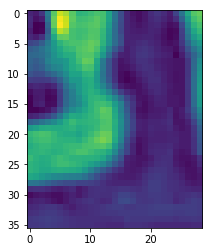

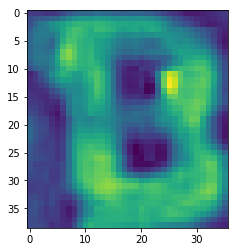

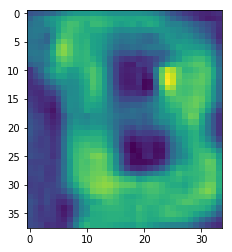

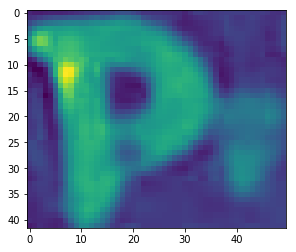

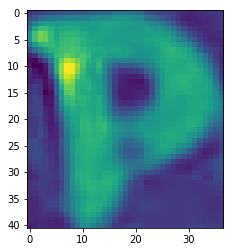

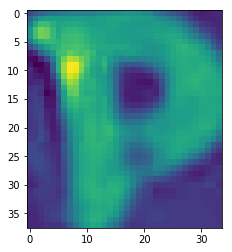

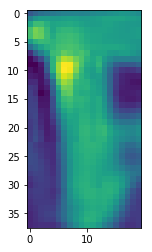

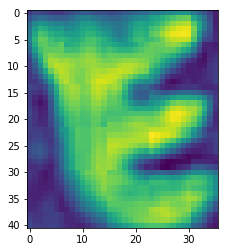

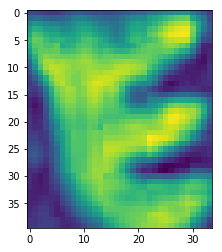

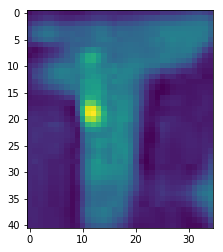

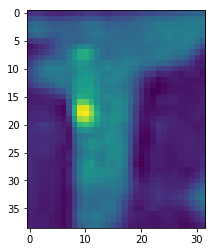

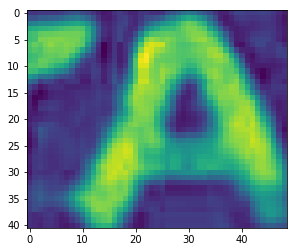

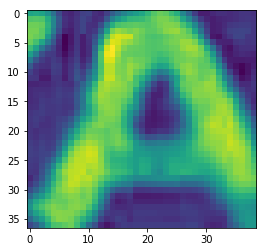

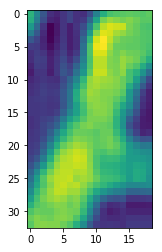

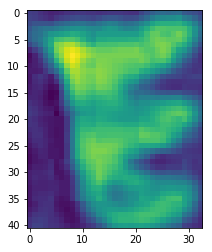

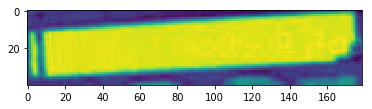

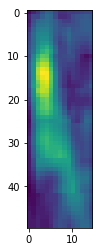

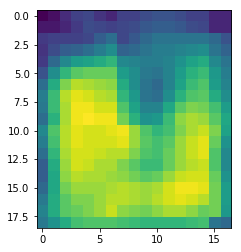

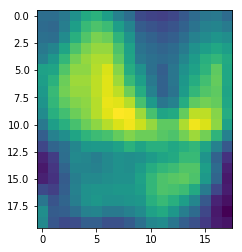

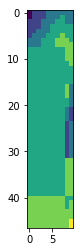

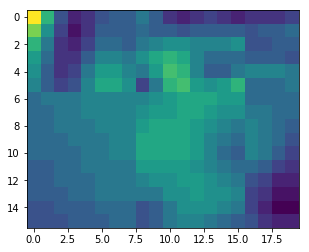

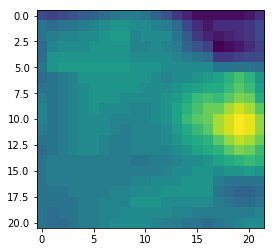

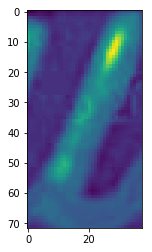

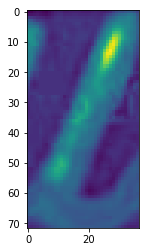

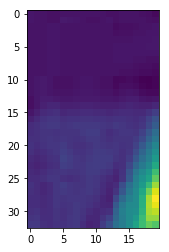

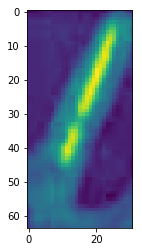

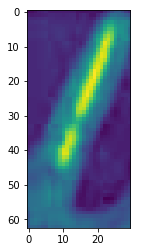

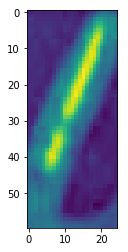

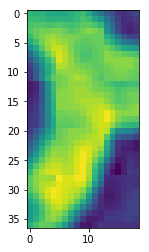

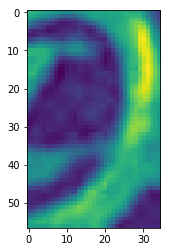

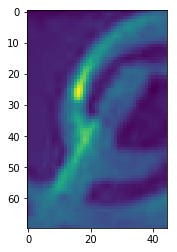

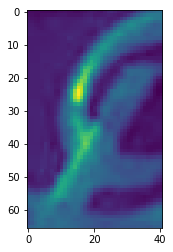

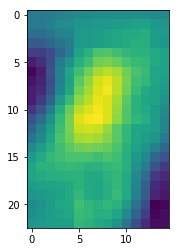

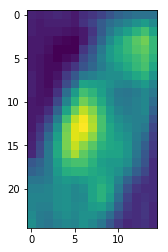

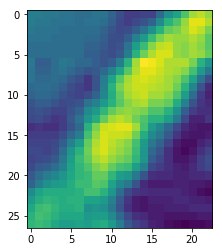

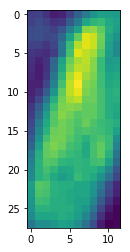

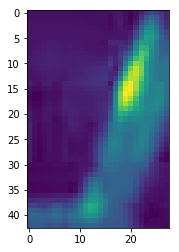

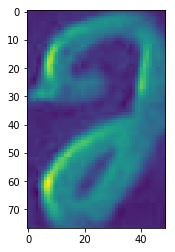

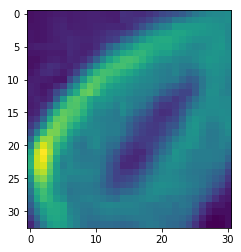

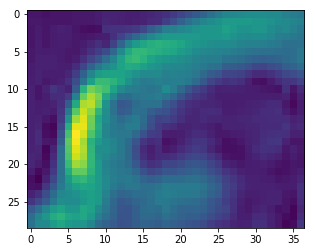

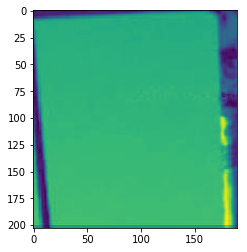

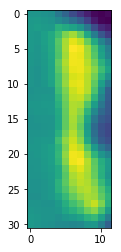

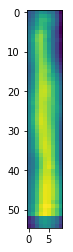

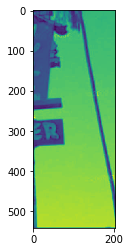

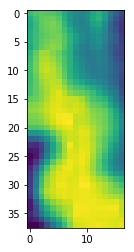

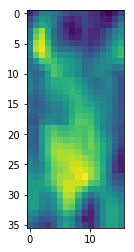

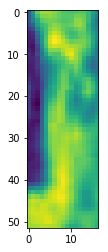

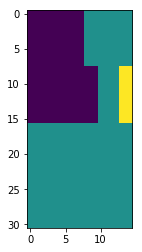

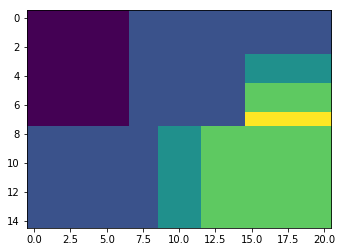

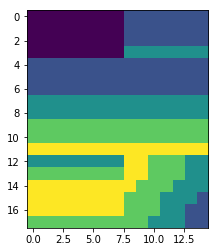

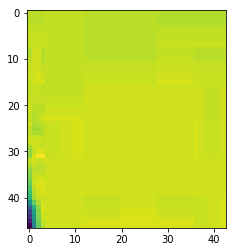

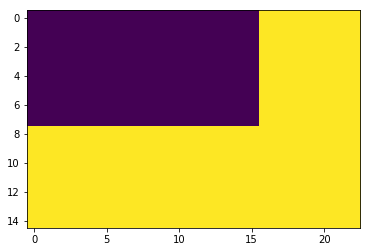

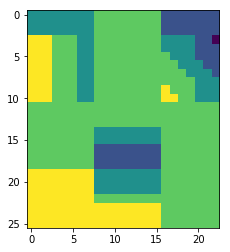

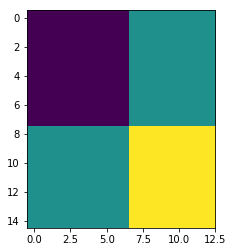

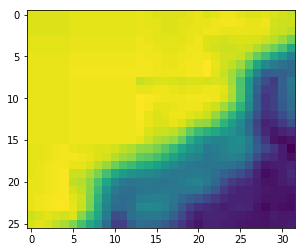

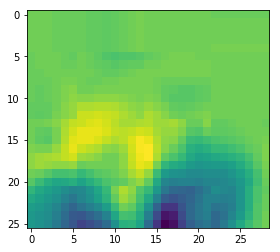

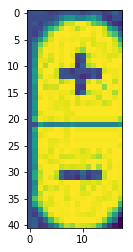

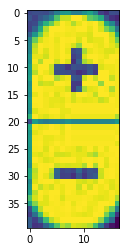

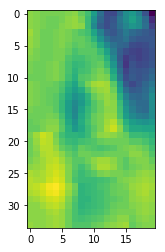

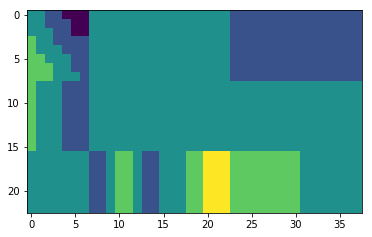

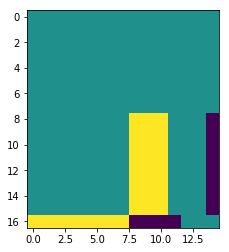

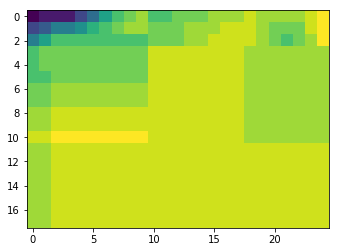

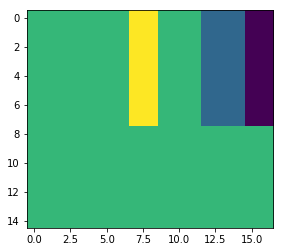

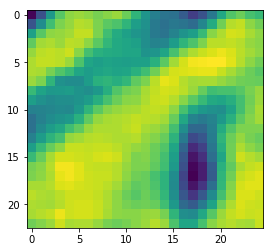

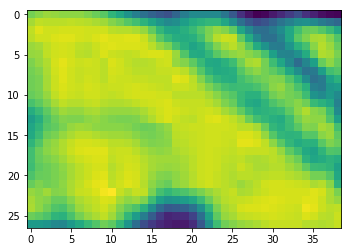

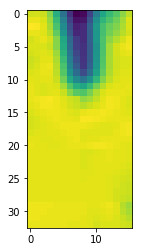

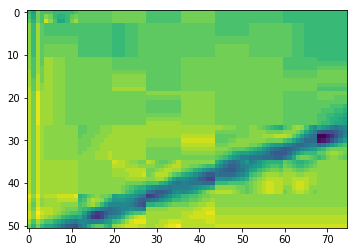

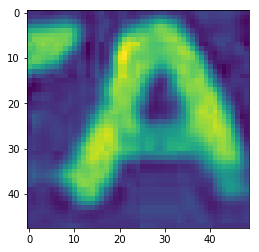

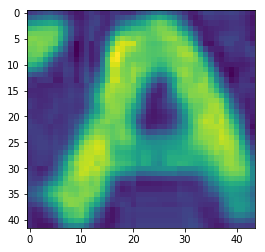

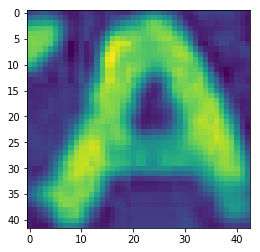

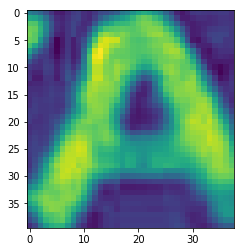

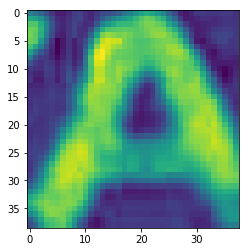

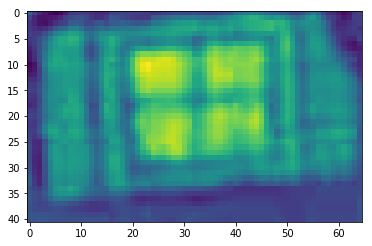

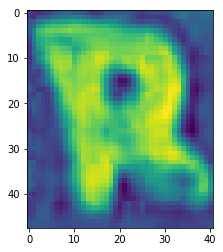

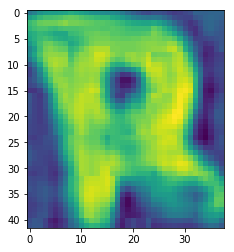

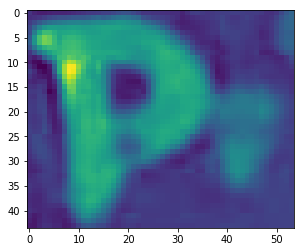

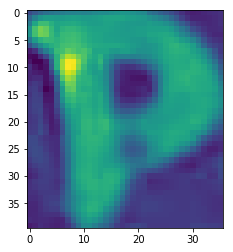

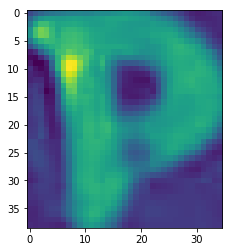

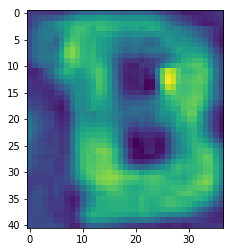

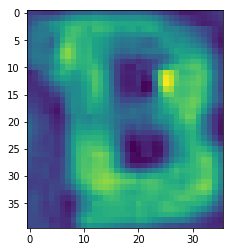

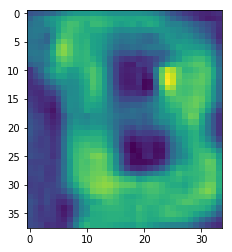

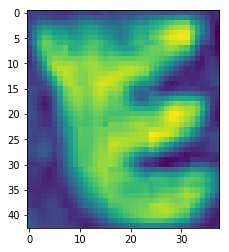

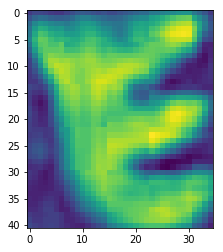

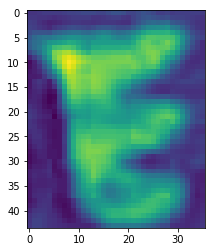

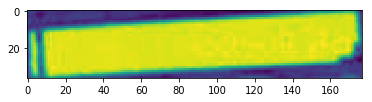

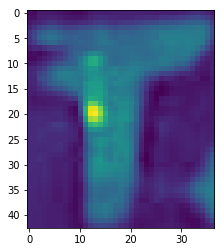

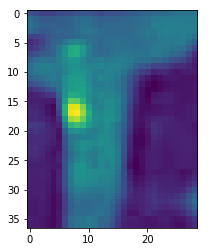

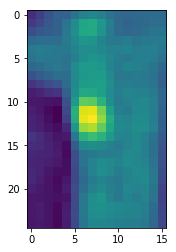

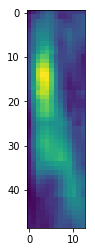

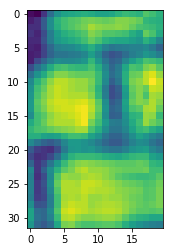

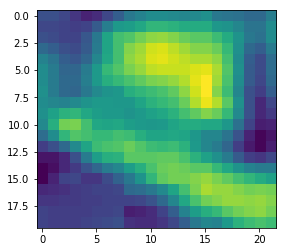

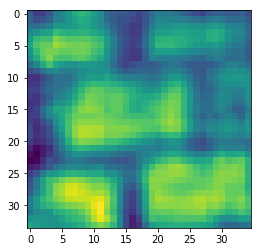

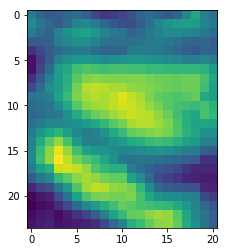

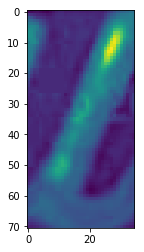

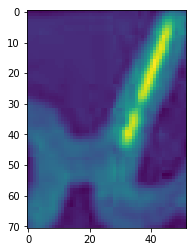

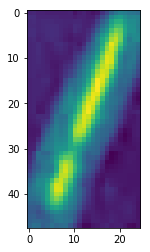

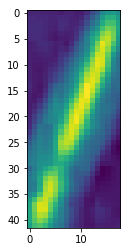

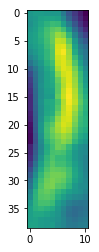

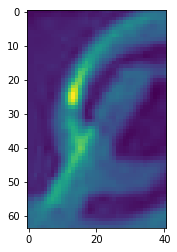

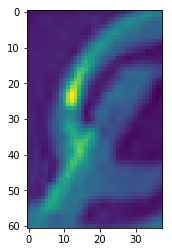

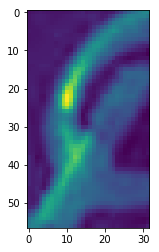

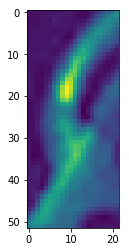

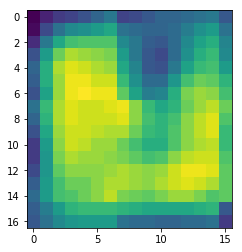

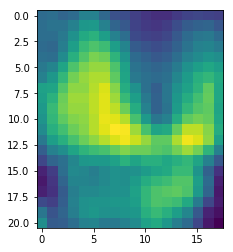

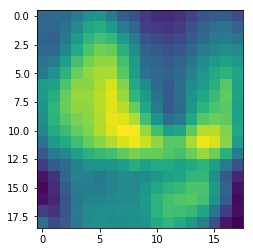

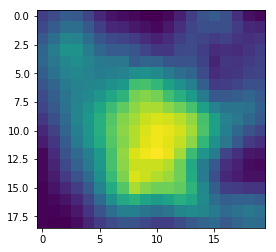

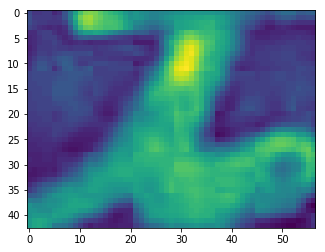

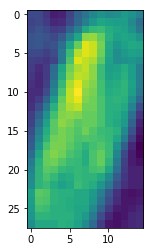

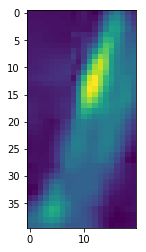

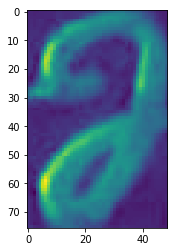

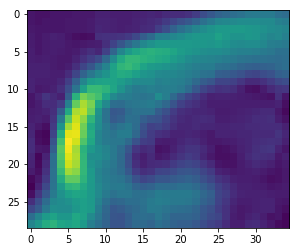

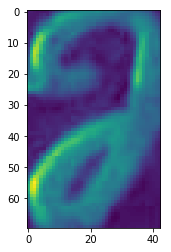

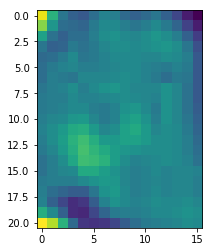

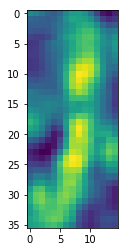

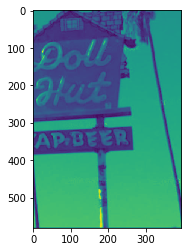

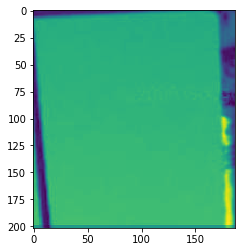

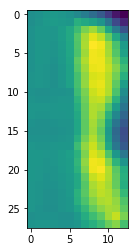

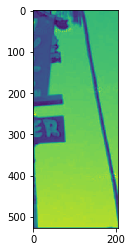

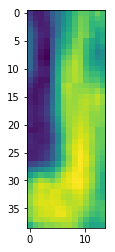

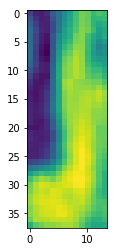

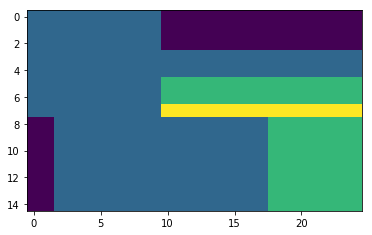

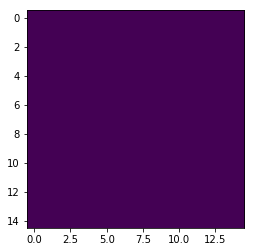

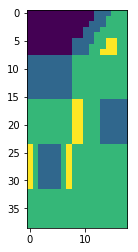

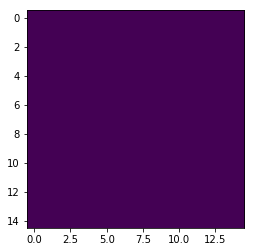

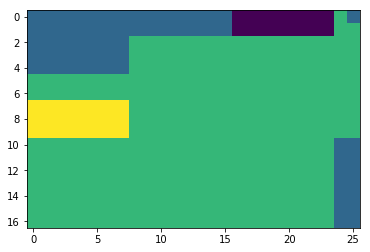

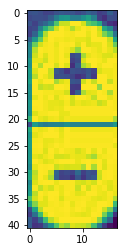

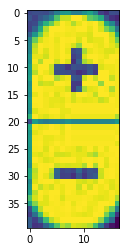

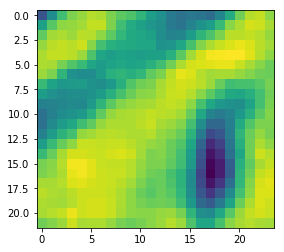

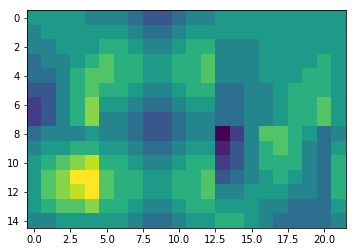

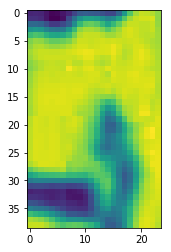

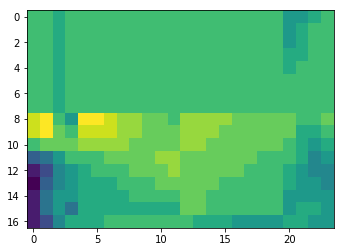

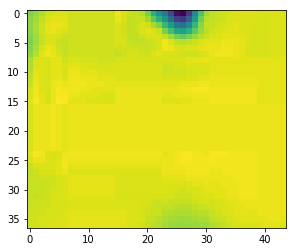

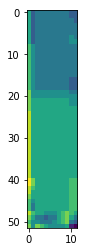

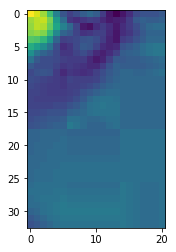

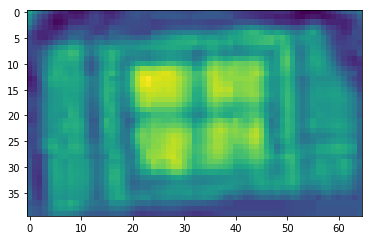

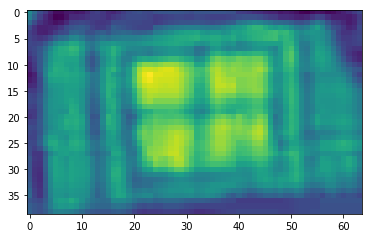

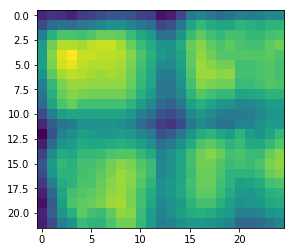

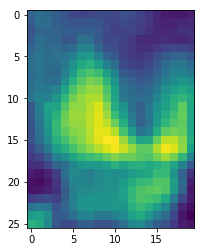

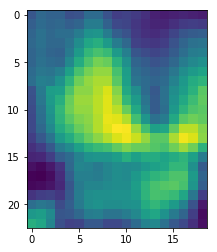

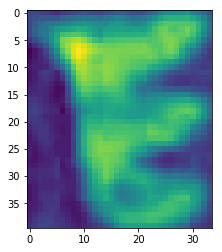

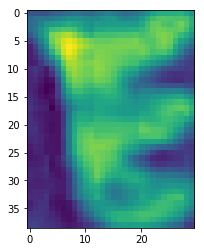

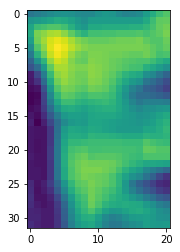

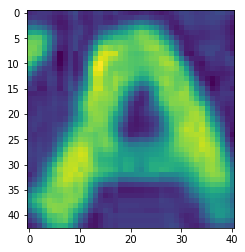

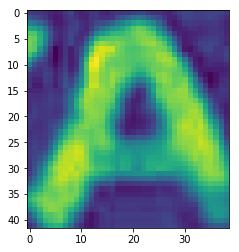

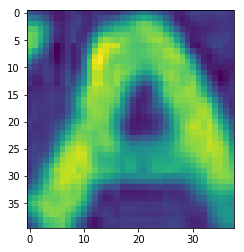

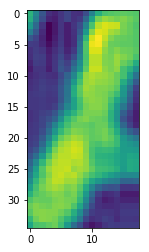

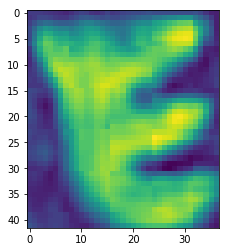

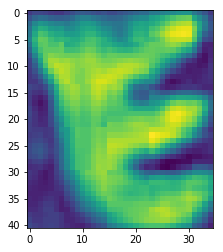

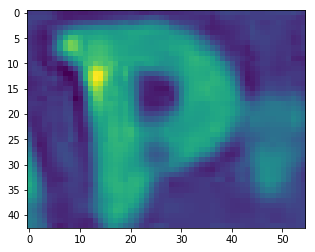

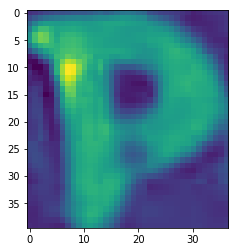

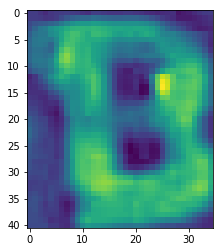

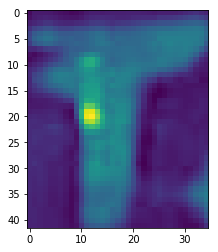

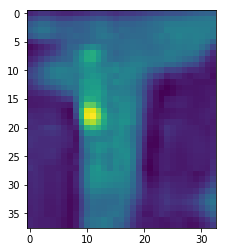

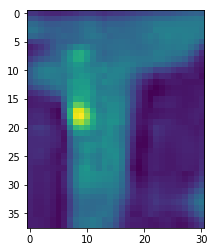

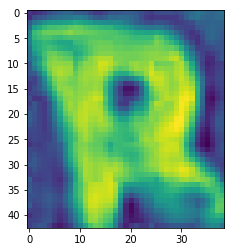

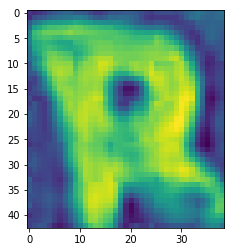

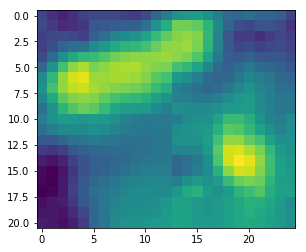

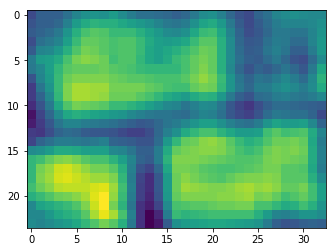

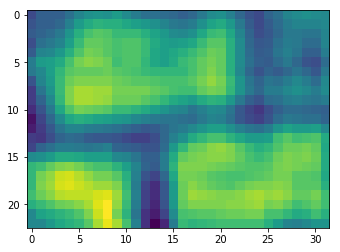

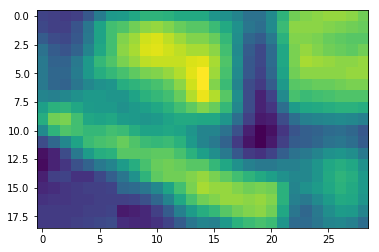

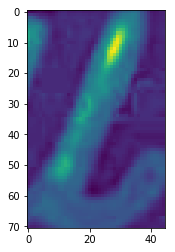

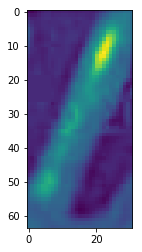

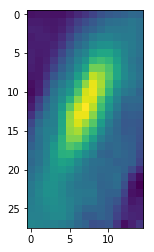

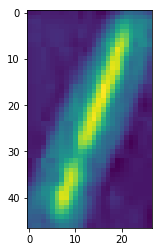

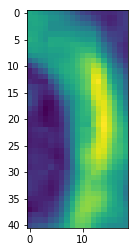

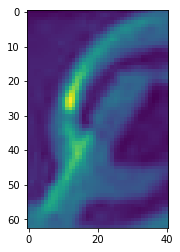

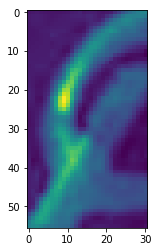

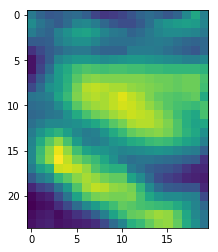

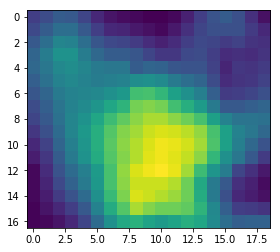

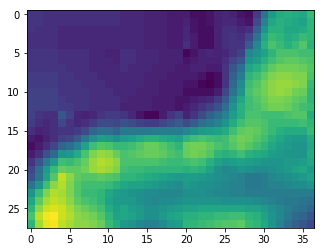

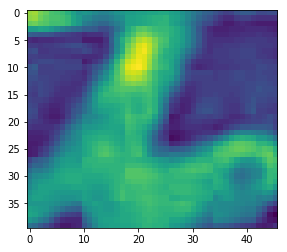

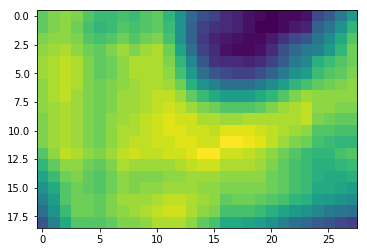

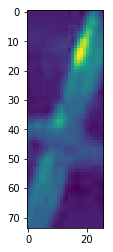

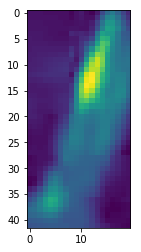

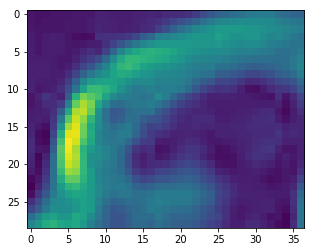

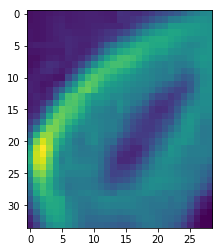

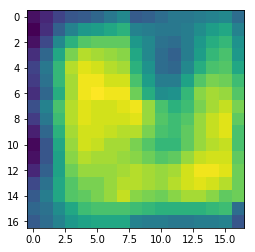

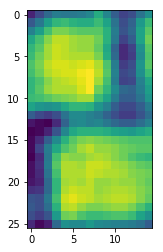

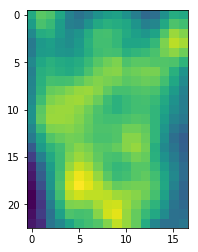

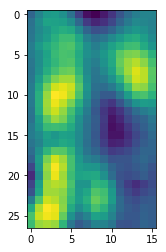

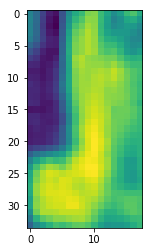

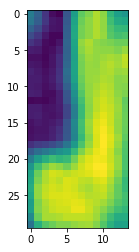

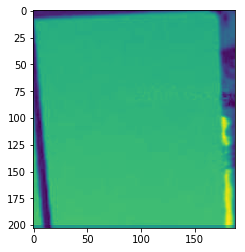

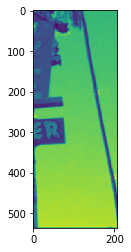

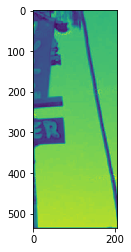

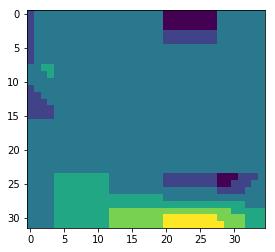

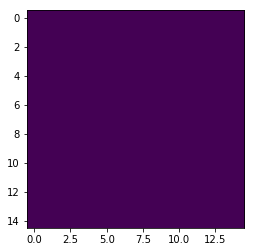

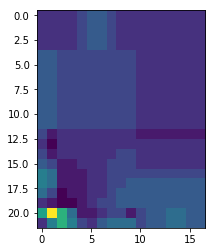

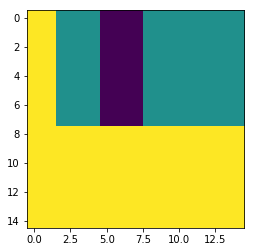

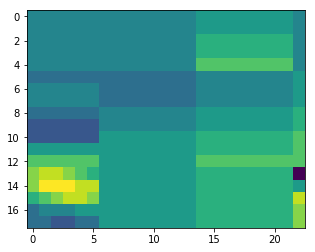

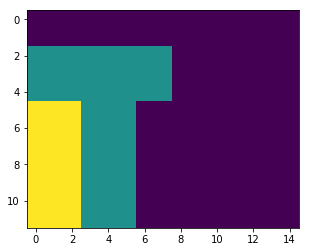

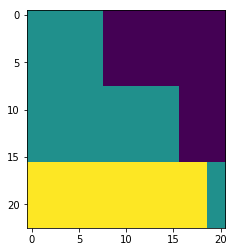

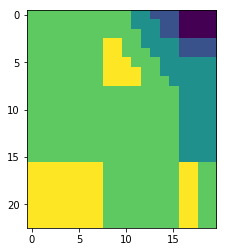

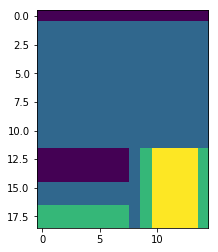

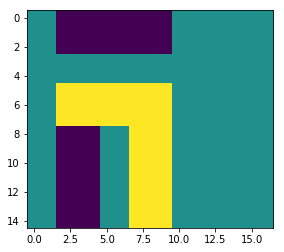

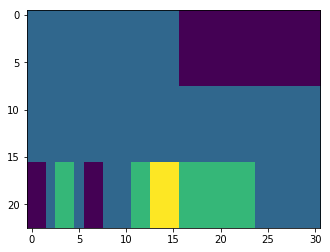

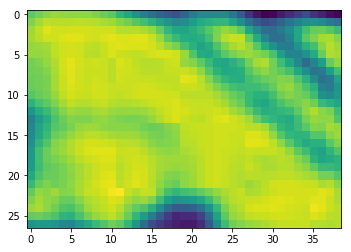

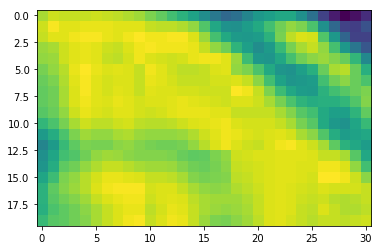

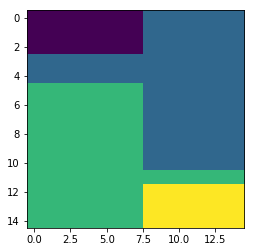

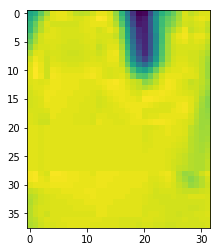

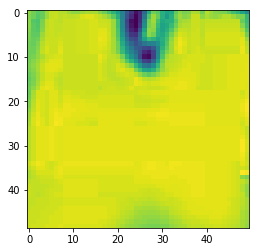

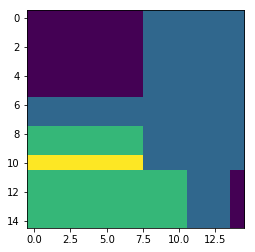

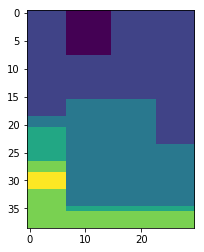

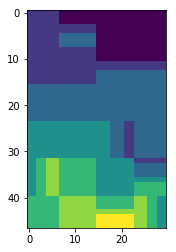

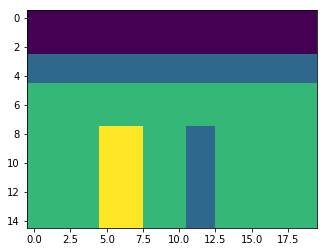

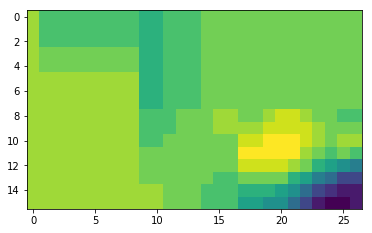

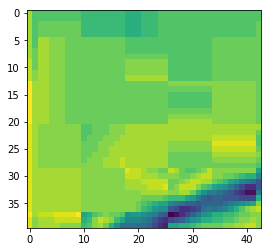

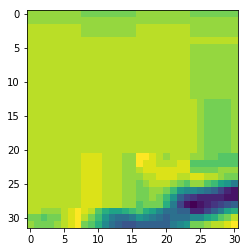

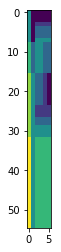

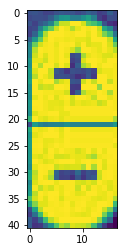

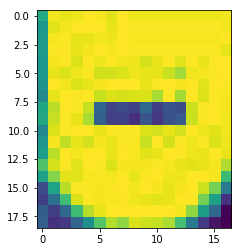

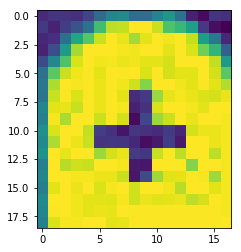

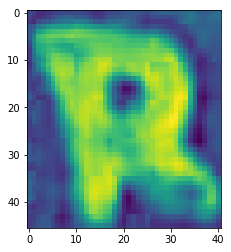

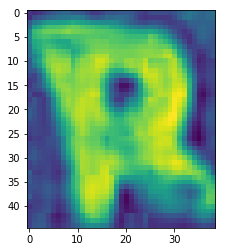

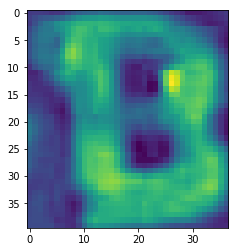

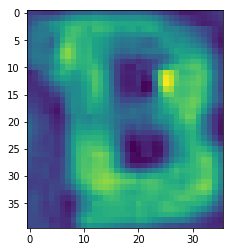

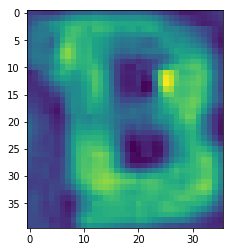

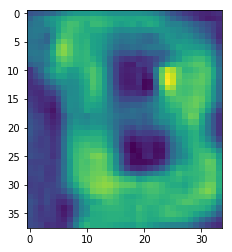

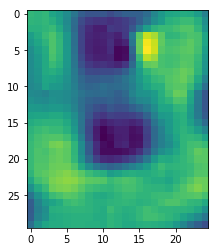

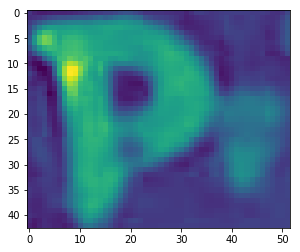

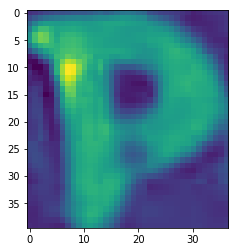

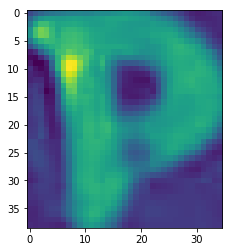

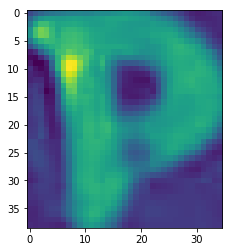

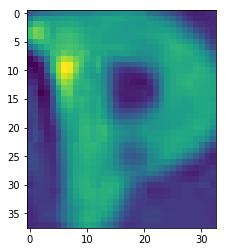

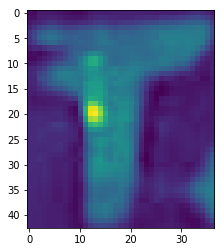

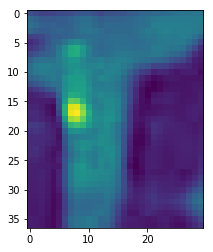

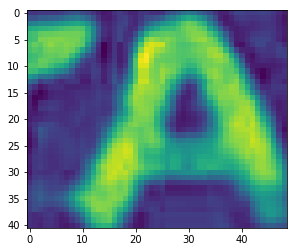

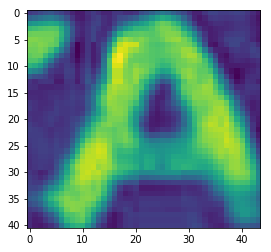

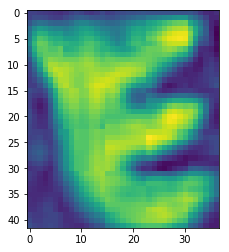

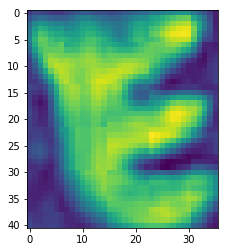

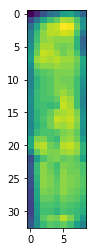

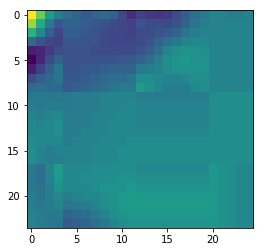

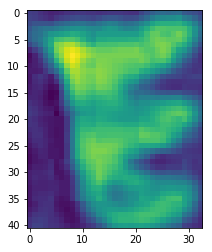

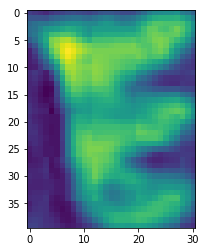

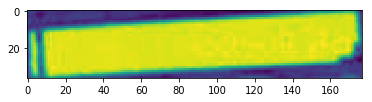

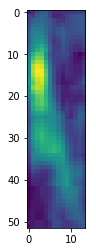

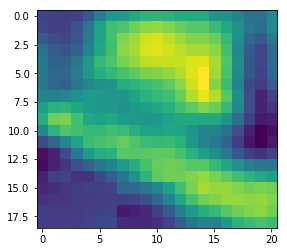

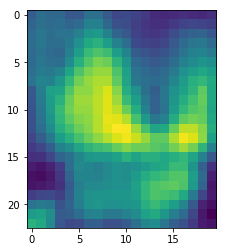

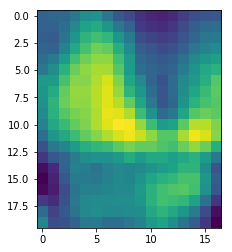

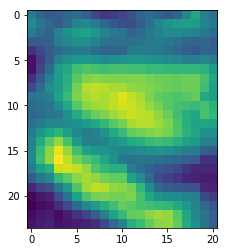

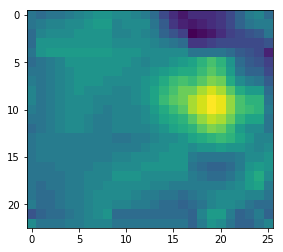

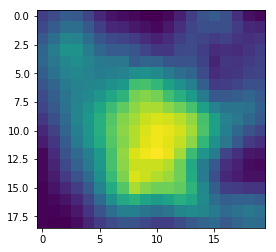

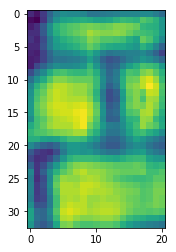

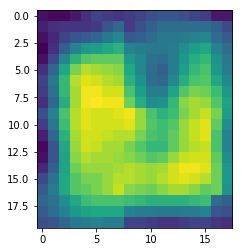

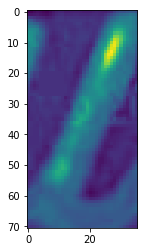

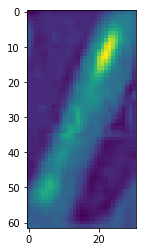

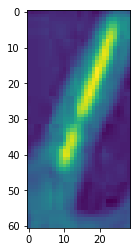

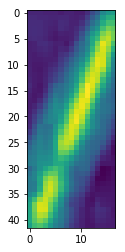

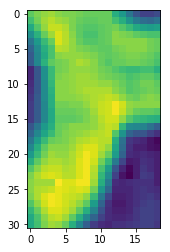

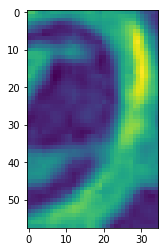

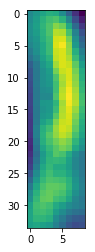

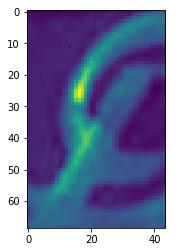

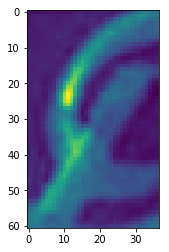

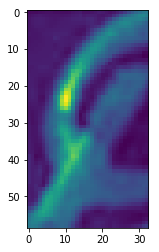

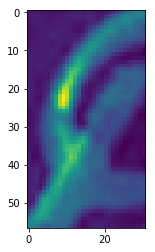

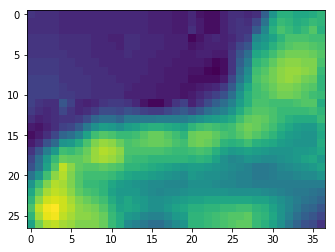

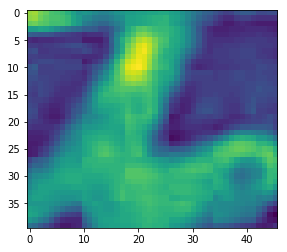

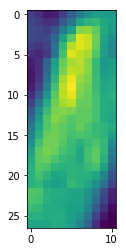

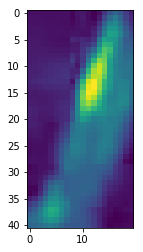

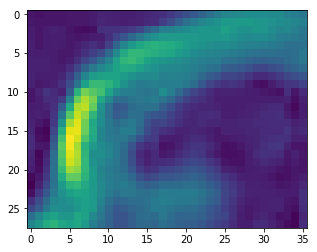

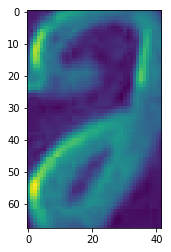

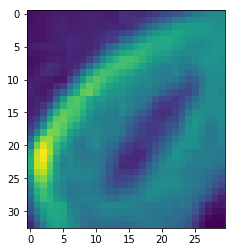

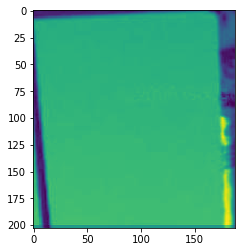

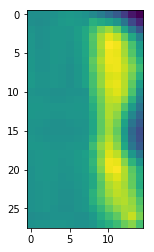

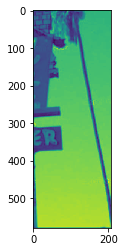

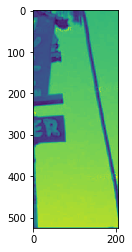

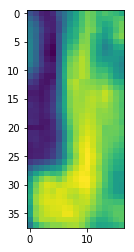

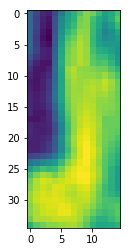

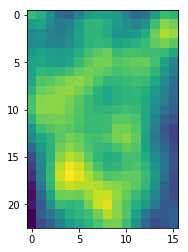

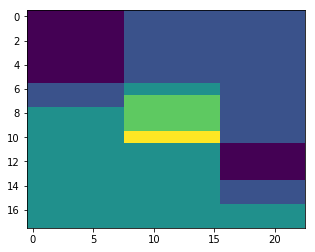

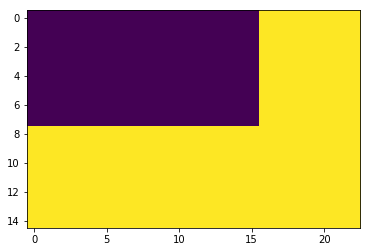

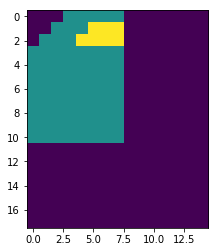

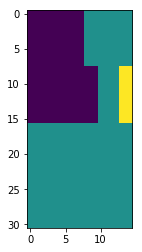

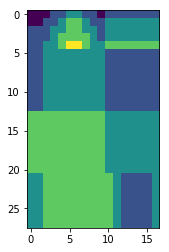

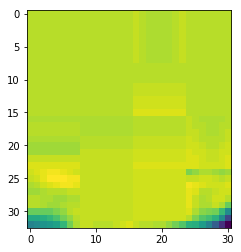

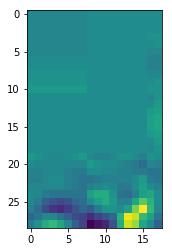

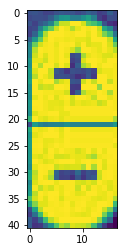

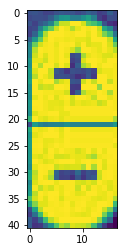

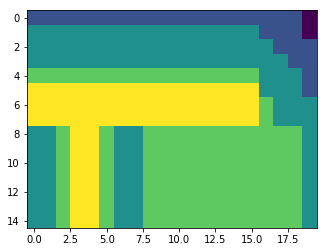

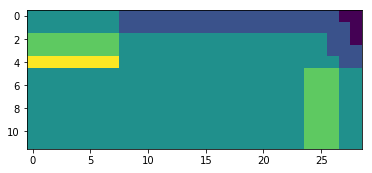

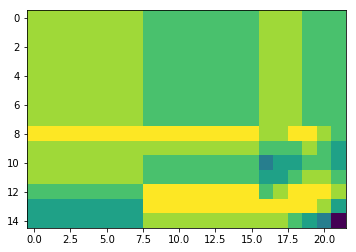

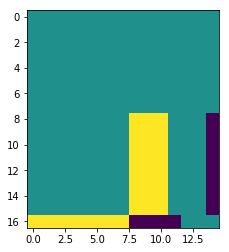

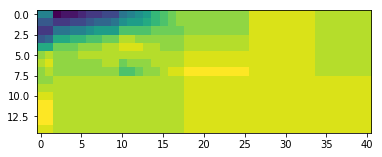

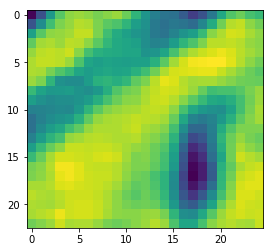

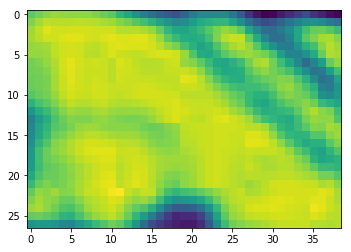

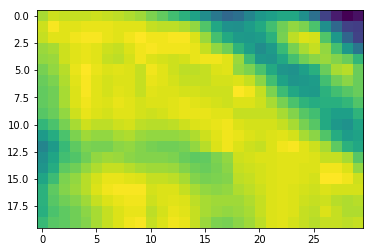

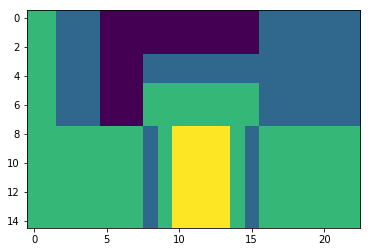

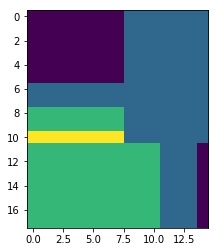

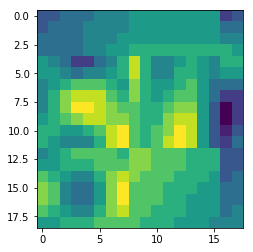

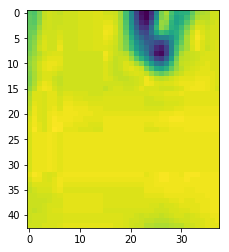

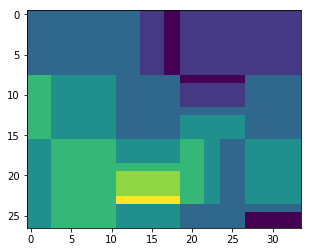

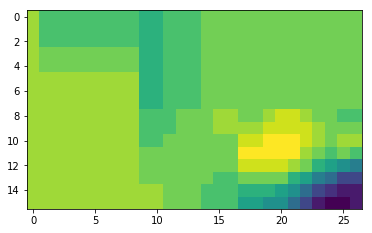

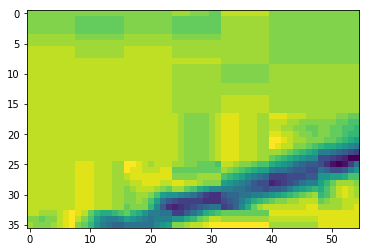

In [265]:
for i in thresh:
    plt.figure()
    plt.imshow(i)
    plt.show()

In [251]:
cv.imwrite("1.png",image);
cv.imwrite("2.png",image2);
cv.imwrite("3.png",image3);
cv.imwrite("4.png",image4);

In [258]:
cv.imwrite("letter.png",thresh[10]);